[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS-3001/blob/main/02_R_function_basics/Class_II_Python.ipynb)

# Pandas Lab Assignment

------------------------------
# MY WORK AT THE BOTTOM!!!!!!
------------------------------


#### The excitement begins! 

As a reminder:

pd == pandas and df == dataframe

### pandas functions
The five key pandas functions that allow you to solve "the vast majority of your data-manipulation challenges" are:
1. df.query() -- select observations by their values
2. df.sort_values() -- Reorder the rows
3. df.loc[] -- Pick variables by their column names
4. df.assign() -- Create new variables with functions of existing variables
5. df.describe() -- Collapse many values down to a single summary

Bonus: df.groupby() -- we can use this in combination with any of the five to change the scope of each function from operating on the entire dataset to operating on it group by group

*A note on df.groupby(): if you want to get multiple results for various groups (e.g. income categories), you could use `df.groupby(by='column')`. This all happens in the background and results in a grouped object; sometimes, this means you need to reorganize your functions.*

For more information, check out the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [1]:
# import libraries
import pandas as pd
import os
os.getcwd()

'/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/Labs'

Labs/data/nfl2008_fga.csv### Instructions

For this assignment you can use any or all of the datasets I provided (described below) or choose two of your own!  

For each of the two datasets your select, produce four parts: 

1. Question
2. Psuedocode that answers the question
3. Single line transactions using pandas functions
4. Pipe the individual lines together and create a function

You can work with your groups for coding tips/advise or work through similar programming issues, but everyone must have their own set of questions and results. 


### Data

Any dataset in the class repo works or:

nf2008_fg: http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv

red_wine_quality: https://data.world/uci/wine-quality

### Example

Lets walk through a example. Below is a dataset on students admitted to a graduate program in Data Science (I actually don't remember where this data came from). 

#### Question: Are there differences in the admitted number of students on average by GPA and school rank?
An easy way to handle this is to identify function calls starting at the end of the question and working backwards. 

#### Pseudocode:
  - Group by school rank
  - Calculate GPA Average
  - Count total admitted 
  - Calculate % Admitted
  - Arrange in descending order by Mean GPA

In [55]:
# Loading and preparing the data
df = pd.read_csv("data/LogReg.csv")

In [56]:
def generate_rank_data(LogRegdf):
    df['total_students'] = ((df['admit'] == 1) | (df['admit'] == 0)).astype('int')
    
    df_grouped = admit_2.groupby(by="rank").agg({"rank":"first","gpa":"mean", "gre":"mean", "admit":"sum", "total_students":"sum"}).reset_index(drop=True)
    
    df_grouped = df_grouped.rename(columns={"gpa":"average_GPA", "gre":"average_GRE", "admit":"num_admitted"})
    
    df_grouped['percent_admitted'] = df_grouped['num_admitted'] / df_grouped['total_students']
    
    return df_grouped

In [57]:
df = generate_rank_data(df)
df.head()

,rank,average_GPA,average_GRE,num_admitted,total_students,percent_admitted
0,1,3.453115,611.803279,33,61,0.540984
1,2,3.361656,596.026490,54,151,0.357616
2,3,3.432893,574.876033,28,121,0.231405
3,4,3.318358,570.149254,12,67,0.179104


Next, we want to factorize `rank`. This will allow better data analysis because there are only a few options for it. In R, these are called "levels". In Python, these are "categorical" variables. Below, we'll run through how to convert specific columns to categoricals.

In [9]:
 #change rank to a categorical variable
admit_2['rank'] = admit_2['rank'].astype("category")   # here, we assign the newly-assigned vars

print(admit_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   admit   400 non-null    int64   
 1   gre     400 non-null    int64   
 2   gpa     400 non-null    float64 
 3   rank    400 non-null    category
dtypes: category(1), float64(1), int64(2)
memory usage: 10.1 KB
None


#### Now, for the next portion: single-line calculations using the pseudocode as a plan

Group by rank and assign the grouped values to a new dataframe

In [8]:
x1 = admit_2.groupby(['rank'])   # this is done in the background

Next, calculate our additional variables (sum of admitted students, sum of students, and the mean GPA of the rankings in each category of `rank`. For this, we will be constructing a new dataframe.

There is *one* issue: you can't use .assign() on a grouped dataframe. There are two possible solutions for this:
1. Make a call to an earlier iteration of the dataframe
2. Initialize an empty dataframe and assign the new variables there.

First, I'll show you what happens in the first instance. You'll want to use this IF you want to keep all the previous columns.

In [9]:
x2 = admit_2.assign(admitted= x1.admit.sum(), 
                    tot_students=x1.admit.count(),
                    meanGPA=x1.gpa.mean())

print(x2)

     admit  gre   gpa  rank  admitted  tot_students   meanGPA
0        0  380  3.61     3       NaN           NaN       NaN
1        1  660  3.67     3      33.0          61.0  3.453115
2        1  800  4.00     1      54.0         151.0  3.361656
3        1  640  3.19     4      28.0         121.0  3.432893
4        0  520  2.93     4      12.0          67.0  3.318358
..     ...  ...   ...   ...       ...           ...       ...
395      0  620  4.00     2       NaN           NaN       NaN
396      0  560  3.04     3       NaN           NaN       NaN
397      0  460  2.63     2       NaN           NaN       NaN
398      0  700  3.65     2       NaN           NaN       NaN
399      0  600  3.89     3       NaN           NaN       NaN

[400 rows x 7 columns]


Let's try the other way.

In [15]:
temp_df = pd.DataFrame()
temp_df = temp_df.assign(admitted= x1.admit.sum(), 
                    tot_students=x1['rank'].count(), 
                    meanGPA=x1.gpa.mean())
temp_df.head()

,admitted,tot_students,meanGPA
rank,,,
1,33,61,3.453115
2,54,151,3.361656
3,28,121,3.432893
4,12,67,3.318358


The second method worked *much* better. But let's say we used the first one -- how could we fix the issue?

This was messier than we would've preferred. As we can see, we've assigned new variables to x2, but it also uses all the other variables from x1. Now, we'll want to select only the values we want.

There are a few ways we could do this:
1. Use slicing to select your columns and rows
2. Use slicing to select your columns and then remove all the NaNs

In [8]:
x2 = x2[['admitted', 'tot_students', 'meanGPA']]   # selecting columns
x2.head(10)

NameError: name 'x2' is not defined

Now, we see the values, but we only want rows 1-4, which correspond to the rank factors we found earlier. To do this, we can either filter out NaNs or select those specific rows. First, let's try slicing.

In [11]:
x3 = x2[1:5]
x3.head(10)

,admitted,tot_students,meanGPA
1,33.0,61.0,3.453115
2,54.0,151.0,3.361656
3,28.0,121.0,3.432893
4,12.0,67.0,3.318358


Now, let's try removing the NaNs instead:

In [12]:
x4 = x2.dropna()   # dropna() is a simplified function of .drop(df.isna())
x4.head()

,admitted,tot_students,meanGPA
1,33.0,61.0,3.453115
2,54.0,151.0,3.361656
3,28.0,121.0,3.432893
4,12.0,67.0,3.318358


Both work!!

Now, we want to calculate the % of students from various ranks that were admitted. We'll create a new variable to store the information.

In [13]:
x3 = x3.assign(ave_admit = lambda x: (x['admitted'] / x['tot_students']))
x3.head()

,admitted,tot_students,meanGPA,ave_admit
1,33.0,61.0,3.453115,0.540984
2,54.0,151.0,3.361656,0.357616
3,28.0,121.0,3.432893,0.231405
4,12.0,67.0,3.318358,0.179104


Now, let's arrange the rows by descending GPA.

In [14]:
x3 = x3.sort_values(by='meanGPA', ascending=False)
x3.head()

,admitted,tot_students,meanGPA,ave_admit
1,33.0,61.0,3.453115,0.540984
3,28.0,121.0,3.432893,0.231405
2,54.0,151.0,3.361656,0.357616
4,12.0,67.0,3.318358,0.179104


Now, we pipe everything together and make a function
#### Function construction

In [15]:
def avg_admission(x):
    x1 = x.groupby(['rank'])
    avg = pd.DataFrame()
    avg = avg.assign(admitted= x1['admit'].sum(), 
                    tot_students=x1['rank'].count(),
                    meanGPA=x1['gpa'].mean()).assign(ave_admit = lambda temp: (temp['admitted'] / temp['tot_students'])).sort_values(by='meanGPA', ascending=False)
    return avg
# move right to see the .sort_values()

As you saw above, some functions were added to each other (specifically, the .assign().assign().sort_values) all happened sequentially. This is called chaining. You could separate for clarity, but this is also a pretty efficient use of space in a program.

In [16]:
print(avg_admission(admit_2))

      admitted  tot_students   meanGPA  ave_admit
rank                                             
1           33            61  3.453115   0.540984
3           28           121  3.432893   0.231405
2           54           151  3.361656   0.357616
4           12            67  3.318358   0.179104


In [64]:
df = pd.read_csv("data/winequality-red-ddl.csv")

In [66]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,text_rank
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3.0,poor
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3.0,poor
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3.0,poor
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3.0,poor
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3.0,poor
5,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3.0,poor
6,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3.0,poor
7,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3.0,poor
8,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3.0,poor
9,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3.0,poor


# QUESTION: IS AVERAGE-ISH WINE WITH MORE ALCOHOL MORE DENSE?

## Pseudocode:
- Sort by alcohol amount
- Filter by just average-ish wine
- Slice table to just include alcohol and sugar columns
- Create plot to show relationship

### ANSWER: NO, THE OPPOSITE

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

## No Function Code:

In [20]:
wine_data = pd.read_csv('data/winequality-red-ddl.csv')

df_sorted = wine_data.sort_values(by='alcohol', ascending=False)
df_average_ish = df_sorted[df_sorted['text_rank'] == 'average-ish']
column_filter = ['density', 'alcohol', 'text_rank']
df_final = df_average_ish[column_filter]

## Function Code:

In [21]:
wine_data = pd.read_csv("data/winequality-red-ddl.csv")

def prepare_wine_data(wine_data):
    df_sorted = wine_data.sort_values(by='alcohol', ascending=False)
    df_average_ish = df_sorted[df_sorted['text_rank'] == 'average-ish']
    column_filter = ['density', 'alcohol', 'text_rank']
    df_final = df_average_ish[column_filter]
    return df_final

In [22]:
df_final = prepare_wine_data(wine_data)

In [23]:
import matplotlib.pyplot as plt

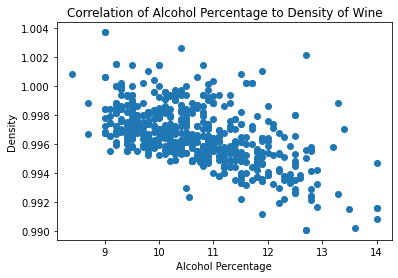

In [24]:
plt.scatter(df_final['alcohol'], df_final['density'])
plt.xlabel("Alcohol Percentage")
plt.ylabel("Density")
plt.title("Correlation of Alcohol Percentage to Density of Wine")
plt.show()

# QUESTION: DO NFL TEAMS KICK FURTHER ON EARLIER DOWNS?

## Pseudocode:
- Sort by distance
- groupby down
- Check if there is a significant correlation using a bar graph


### ANSWER: The kick distance is not dramatically affected by down #

## No-Function Code:

In [16]:
df = pd.read_csv("data/nfl2008_fga.csv")

df.sort_values(by='distance', ascending=False)
df_grouped = df.groupby("down").agg({"down":"first","distance":"mean"}).reset_index(drop=True)
cols = ['down', 'distance']
df = df_grouped[cols]

## Function Code:

In [17]:
df = pd.read_csv("data/nfl2008_fga.csv")

def prepare_nfl_data(df):
    df.sort_values(by='distance', ascending=False)
    df_grouped = df.groupby("down").agg({"down":"first","distance":"mean"}).reset_index(drop=True)
    cols = ['down', 'distance']
    return df_grouped[cols]

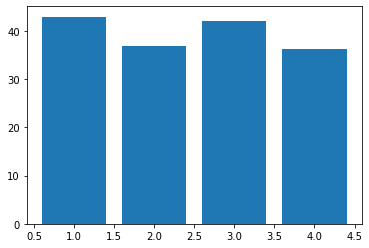

In [18]:
df_down_distance = prepare_nfl_data(df)

plt.bar(df_grouped['down'], df_grouped['distance'])
plt.show()